# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [60]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [61]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [62]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

Aviso: seaborn no está instalado en este entorno.
Instale seaborn con:
  c:\Users\anluc\AppData\Local\Programs\Python\Python313\python.exe -m pip install seaborn


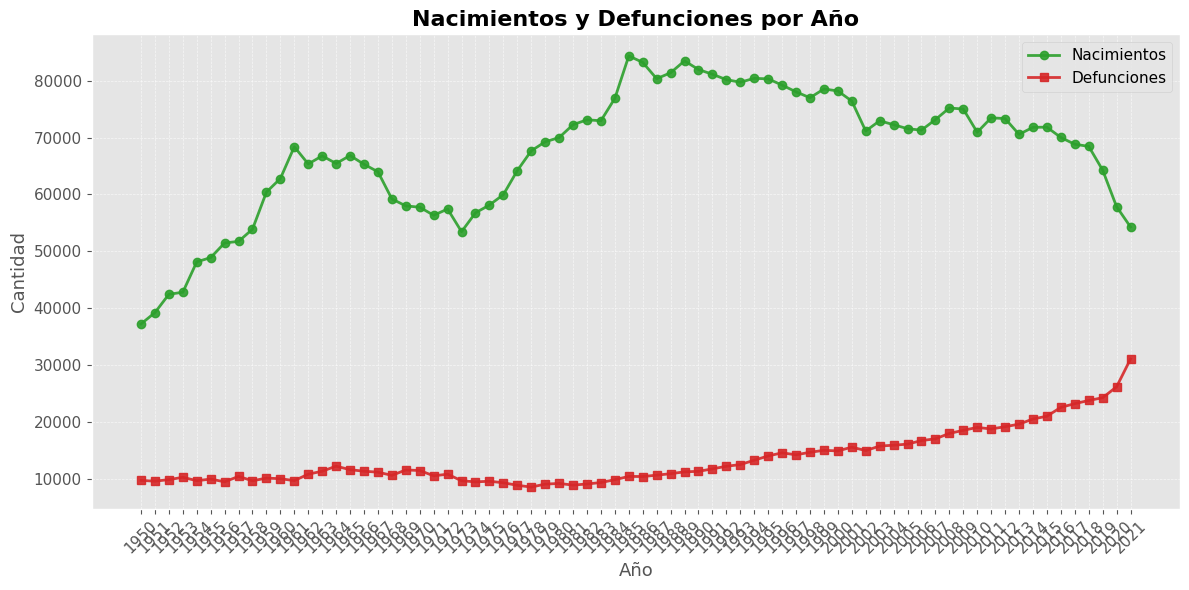

In [63]:
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_style('whitegrid')
    sns.set_palette('colorblind')
    # opcional: mostrar versión para depuración
    try:
        import pkg_resources
        print('seaborn versión:', pkg_resources.get_distribution('seaborn').version)
    except Exception:
        pass
except ImportError:
    import sys
    print('Aviso: seaborn no está instalado en este entorno.')
    print('Instale seaborn con:')
    print(f"  {sys.executable} -m pip install seaborn")
    # Fallback seguro: seleccionar un estilo disponible en matplotlib
    try:
        avail = plt.style.available
        if 'seaborn-whitegrid' in avail:
            plt.style.use('seaborn-whitegrid')
        elif 'seaborn' in avail:
            plt.style.use('seaborn')
        elif 'ggplot' in avail:
            plt.style.use('ggplot')
        else:
            plt.style.use('default')
    except Exception as e:
        # En caso de cualquier error, usar estilos por defecto sin romper el notebook
        print('No se pudo aplicar estilo. Usando estilo por defecto. Error:', e)
        plt.style.use('default')
    # Paleta básica para mantener contraste entre series
    colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Crear figura más grande
plt.figure(figsize=(12,6))

# Dibujar líneas con markers y transparencia
plt.plot(df['Año'], df['Nacimientos'], color='tab:green', marker='o', linewidth=2, markersize=6, alpha=0.9, label='Nacimientos')
plt.plot(df['Año'], df['Defunciones'], color='tab:red', marker='s', linewidth=2, markersize=6, alpha=0.9, label='Defunciones')

# Títulos y etiquetas
plt.title('Nacimientos y Defunciones por Año', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)

# Rotar ticks y ajustar tamaño
plt.xticks(df['Año'], rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Leyenda, grid y ajuste final
plt.legend(fontsize=11, loc='best', frameon=True)
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.plot(df['Año'], df['Nacimientos'], label='Nacimientos', color='blue', marker='o')
plt.title('Nacimientos en Costa Rica (Datos Históricos)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Nacimientos', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.plot(df['Año'], df['Defunciones'], label='Defunciones', color='red', marker='o')

In [64]:
# Seleccionar las columnas Año y Nacimientos de forma simple
cols = ['Año', 'Nacimientos']
if set(cols).issubset(df.columns):
    dff = df[cols].copy()
    # Mostrar las primeras filas para verificar
    dff.head()
else:
    missing = [c for c in cols if c not in df.columns]
    print('Faltan columnas en el DataFrame:', missing)

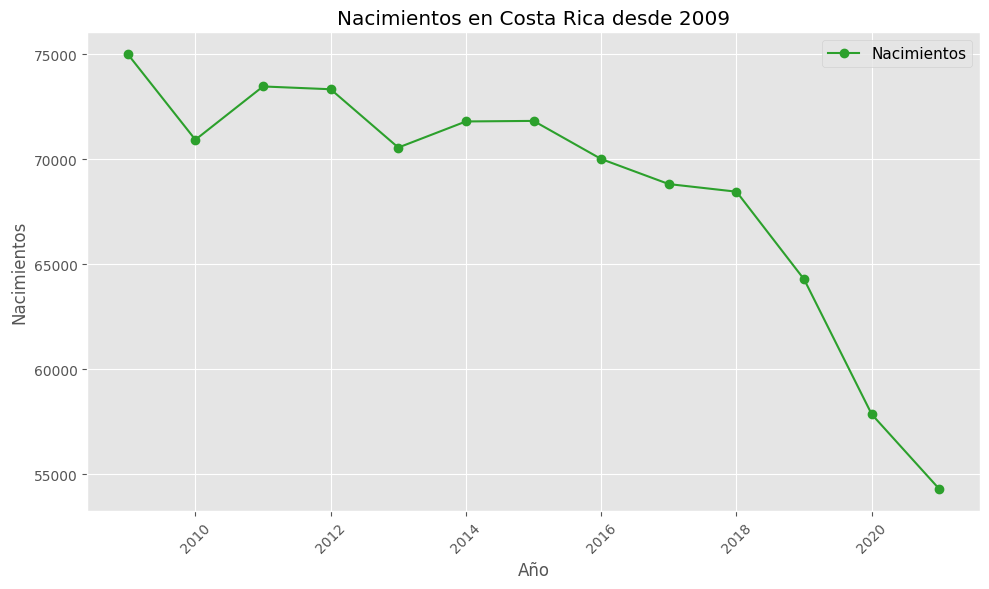

In [65]:
# Filtrar datos desde el año 2009 (incluye 2009)
dffiltrado = df[df['Año'] >= 2009][["Año", "Nacimientos"]]

# Dibujar la serie y obtener el objeto Axes para personalizar
ax = dffiltrado.plot(x='Año', y='Nacimientos', kind='line', marker='o', figsize=(10, 6), title='Nacimientos en Costa Rica desde 2009')

# Ajustar etiquetas y leyenda correctamente
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Nacimientos', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.grid(True)
ax.legend(['Nacimientos'], fontsize=11)

import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [ ]:
# total_nacimientos
# total_defunciones
p

NameError: name 'N' is not defined

**2\. Añadir una nueva columna con el saldo poblacional :**

In [ ]:
#Saldo Poblacional


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [ ]:
import matplotlib.pyplot as plt


### **Gráfico de barras: Comparación de nacimientos y defunciones**

In [ ]:
# Crear gráfico de barras



In [ ]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]

# Crear gráfico de barras



### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [ ]:
#


2. **Calcular promedios:**

In [ ]:
#

3. **Graficar:**

In [ ]:
#
